# Using Random Number Generators (RNGs) in Python

We can conveniently use RNGs from NumPy to get loads of random numbers. This could for example be used to compare the results of our magnetic tunnel junction (MTJ) RNG.

We can for example generate $n$ random integers in the interval $[0, 100)$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

rng = np.random.default_rng()
n = 10000

numbers = rng.integers(0, 100, size=n)

We should expect the normalized frequency of each integer to be 0.01.

/var/folders/6g/lh1pblvx51zgy2yzn03xbj880000gn/T/ipykernel_93276/160664728.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


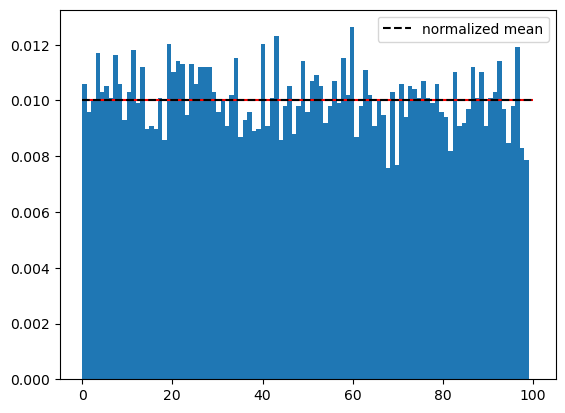

In [2]:
fig, ax = plt.subplots(1, 1)
ax.hist(numbers, 100, density=True)
ax.hlines(
    0.01,
    0,
    100,
    "red",
)

frequencies = np.unique(numbers, return_counts=True)
ax.hlines(
    frequencies[1].mean() / n,
    0,
    100,
    "black",
    linestyles="dashed",
    label="normalized mean",
)

ax.legend()
fig.show()

We should also expect the deviation to follow a normal distribution.

/var/folders/6g/lh1pblvx51zgy2yzn03xbj880000gn/T/ipykernel_93276/1051344117.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


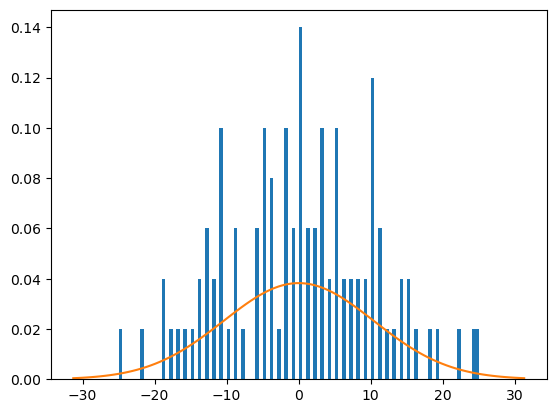

In [3]:
errors = -frequencies[1] + frequencies[1].mean()

fig, ax = plt.subplots(1, 1)
ax.hist(errors, 100, align="mid", density=True)

mean = errors.mean()
std = errors.std()

x = np.linspace(-3*std, 3*std, 100)
ax.plot(x, norm.pdf(x, loc=mean, scale=std))

fig.show()